<a href="https://colab.research.google.com/github/Raphael-Oliveira-01/Projetos-de-An-lises-financeiras-do-Brasil/blob/main/An%C3%A1lise_de_Risco_e_Retorno_de_Ativos_Brasileiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----

### **Mini-Projeto: Análise de Risco e Retorno de Ativos Brasileiros**

Este projeto fará uma análise exploratória das ações da Petrobras (PETR4), e a comparará com o Ibovespa.

-----

#### **Título do Projeto**

*Análise Quantitativa de Risco e Retorno: Estudo de Caso com PETR4 e o Índice Ibovespa.*

#### **Objetivo:**

Analisar o comportamento histórico do preço da ação PETR4, calcular suas métricas de risco e retorno, e entender sua relação com o mercado brasileiro (representado pelo Ibovespa) através de visualizações, correlação e uma regressão linear simples para calcular o Beta do ativo.

#### **Ferramentas:**

  * Python
  * Bibliotecas: Pandas (manipulação de dados), yfinance (download de dados do mercado), Matplotlib/Seaborn (visualização) e Scikit-learn (regressão linear).


In [1]:
# Instala a biblioteca do Yahoo Finance para baixar dados do mercado de ações
!pip install yfinance

#### **Passo 1: Carregar os Dados**

Histórico dos últimos 5 anos para a Petrobras (PETR4.SA) e o índice Ibovespa (^BVSP).

In [2]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define os tickers (códigos dos ativos) e o período
tickers = ['PETR4.SA', '^BVSP']
start_date = '2020-01-01'
end_date = '2025-01-01'

# Baixa os dados usando a biblioteca yfinance
dados = yf.download(tickers, start=start_date, end=end_date)['Close']

# Renomeia as colunas ( o inplace=True realiza a renomeação de colunas. É aplicada diretamente no DataFrame dados)
dados.rename(columns={'PETR4.SA': 'PETR4', '^BVSP': 'IBOV'}, inplace=True)

# Exibe os 5 primeiros registros
print("Dados brutos:")
print(dados.head())

/tmp/ipython-input-2-2272235313.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  2 of 2 completed

Dados brutos:
Ticker          PETR4      IBOV
Date                           
2020-01-02  12.151795  118573.0
2020-01-03  12.052841  117707.0
2020-01-06  12.195337  116878.0
2020-01-07  12.147839  116662.0
2020-01-08  12.072634  116247.0


#### **Passo 2: Limpeza e Preparação dos Dados**

In [3]:

# Verificação de dados faltantes
print("\nVerificação de dados nulos:")
print(dados.isnull().sum())

# Remoção de quaisquer linhas com dados faltantes (se houver)
dados.dropna(inplace=True)

# Calcula os retornos diários percentuais
retornos = dados.pct_change()
retornos.dropna(inplace=True) # O primeiro dia não terá retorno, então removemos

print("\nRetornos diários:")
print(retornos.head())


Verificação de dados nulos:
Ticker
PETR4    0
IBOV     0
dtype: int64

Retornos diários:
Ticker         PETR4      IBOV
Date                          
2020-01-03 -0.008143 -0.007304
2020-01-06  0.011823 -0.007043
2020-01-07 -0.003895 -0.001848
2020-01-08 -0.006191 -0.003557
2020-01-09 -0.003279 -0.002581


#### **Passo 3: Análise Exploratória e Visualizações**

**a) Gráfico de Preços Históricos:** Para vizualizar a evolução dos ativos.

<Figure size 1400x700 with 0 Axes>

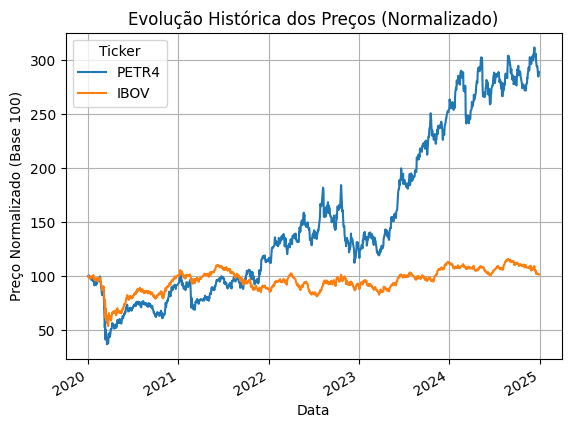

In [4]:

# Normaliza os dados para começar em 100 e facilitar a comparação visual
dados_normalizados = (dados / dados.iloc[0] * 100)

# Plota o gráfico
plt.figure(figsize=(14, 7))
dados_normalizados.plot()
plt.title('Evolução Histórica dos Preços (Normalizado)')
plt.xlabel('Data')
plt.ylabel('Preço Normalizado (Base 100)')
plt.grid(True)
plt.show()

**b) Histograma dos Retornos Diários:** Para ver a distribuição e a volatilidade.

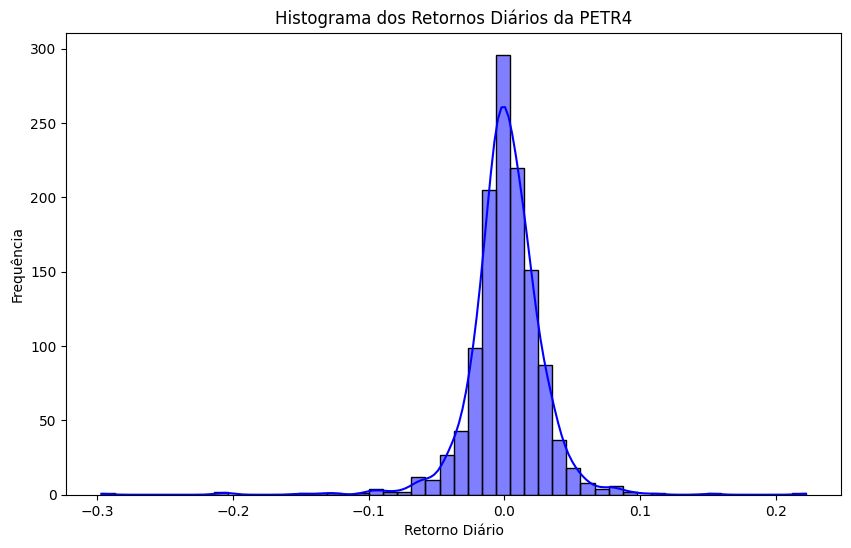

Volatilidade diária da PETR4: 2.83%


In [5]:

# Plota o histograma dos retornos da PETR4
plt.figure(figsize=(10, 6))
sns.histplot(retornos['PETR4'], bins=50, kde=True, color='blue')
plt.title('Histograma dos Retornos Diários da PETR4')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()

# Imprime a volatilidade (desvio padrão dos retornos)
volatilidade_petr4 = retornos['PETR4'].std()
print(f"Volatilidade diária da PETR4: {volatilidade_petr4:.2%}")

#### **Passo 4: Análise de Correlação**

Relação entre os movimentos da PETR4 e do Ibovespa.

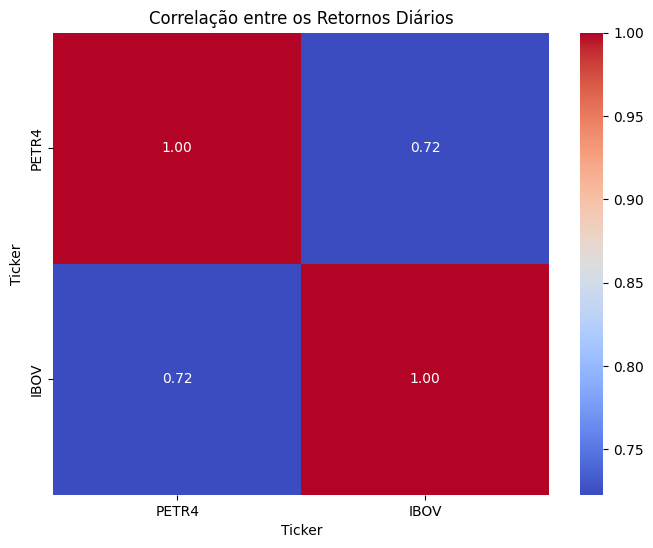


Matriz de Correlação:
Ticker     PETR4      IBOV
Ticker                    
PETR4   1.000000  0.722754
IBOV    0.722754  1.000000


In [6]:

# Calcula a matriz de correlação
correlacao = retornos.corr()

# Plota um heatmap (mapa de calor) para visualizar a correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre os Retornos Diários')
plt.show()

print("\nMatriz de Correlação:")
print(correlacao)

 **Interpretação:**

* Diagonal principal (PETR4 vs PETR4, IBOV vs IBOV): Os valores são sempre 1.00. O que faz sentido, pois um ativo tem correlação perfeita consigo mesmo – quando a PETR4 sobe, a PETR4 sobe.

* Fora da diagonal (PETR4 vs IBOV, IBOV vs PETR4): Você encontra o coeficiente de correlação entre os retornos da PETR4 e do IBOV, que no caso é 0.74.

Isso significa que há uma correlação positiva forte entre os retornos diários da PETR4 e do Ibovespa. Quando o Ibovespa tem um retorno positivo em um dia, a PETR4 tende a ter um retorno positivo também, e quando o Ibovespa tem um retorno negativo, a PETR4 tende a ter um retorno negativo. A relação é forte (próxima de 1), mas não perfeita.

#### **Passo 5: Regressão Linear Simples (Calculando o Beta)**

O Beta ($\\beta$) é uma medida de risco. Ela nos diz o quão volátil é uma ação em comparação com o mercado como um todo (o Ibovespa).

  * $\\beta = 1$: A ação se move em linha com o mercado.
  * $\\beta > 1$: A ação é mais volátil que o mercado (mais "agressiva").
  * $\\beta < 1$: A ação é menos volátil que o mercado (mais "defensiva").

<!-- end list -->


O Beta da PETR4 em relação ao Ibovespa é: 1.26
O R-quadrado da regressão é: 0.52


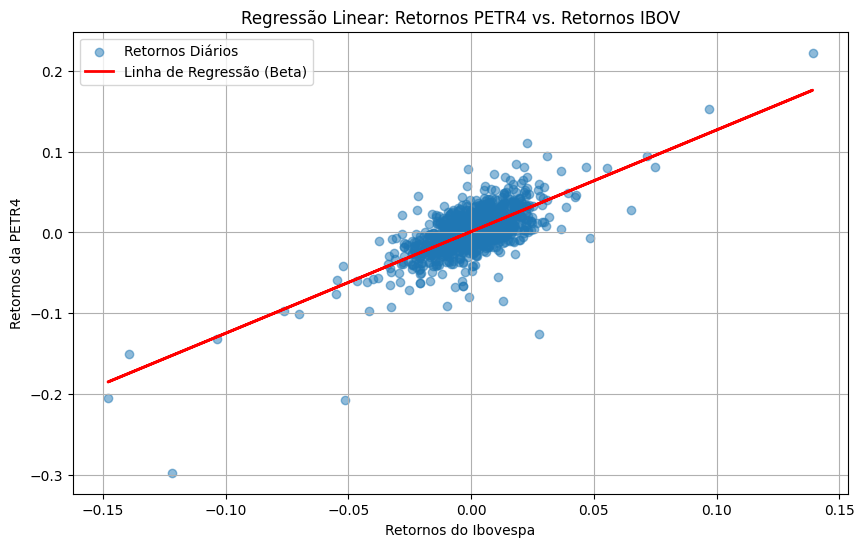

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score # Importa a função para calcular o R-quadrado

# Prepara os dados para a regressão
# X é a variável independente (retornos do mercado/IBOV)
# y é a variável dependente (retornos do ativo/PETR4)
X = retornos['IBOV'].values.reshape(-1, 1)
y = retornos['PETR4'].values.reshape(-1, 1)

# Cria e treina o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, y)

# O coeficiente angular da regressão é o Beta
beta = modelo.coef_[0][0]

# Calcula as previsões do modelo para os retornos da PETR4
y_pred = modelo.predict(X)

# Calcula o R-quadrado
r_squared = r2_score(y, y_pred)

print(f'\nO Beta da PETR4 em relação ao Ibovespa é: {beta:.2f}')
print(f'O R-quadrado da regressão é: {r_squared:.2f}') # Adiciona a impressão do R-quadrado

# Plot visual da regressão (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Retornos Diários')
plt.plot(X, modelo.predict(X), color='red', linewidth=2, label='Linha de Regressão (Beta)')
plt.title('Regressão Linear: Retornos PETR4 vs. Retornos IBOV')
plt.xlabel('Retornos do Ibovespa')
plt.ylabel('Retornos da PETR4')
plt.legend()
plt.grid(True)
plt.show()

**Interpretação do Beta (1.26):**

*  O Beta é uma medida de risco sistemático (o risco que não pode ser diversificado) e indica a sensibilidade dos retornos de um ativo aos movimentos do mercado como um todo.
*  Um Beta de 1.26 significa que, historicamente, os retornos da PETR4 tenderam a se mover 1.26 vezes mais do que os retornos do Ibovespa.
*  **Conclusão:** Um Beta maior que 1 (1.26 > 1) classifica a PETR4 como uma ação mais agressiva ou mais volátil do que o mercado (Ibovespa). Quando o Ibovespa sobe 1%, a PETR4 tende a subir, em média, 1.26%. Quando o Ibovespa cai 1%, a PETR4 tende a cair, em média, 1.26%. Isso sugere que a PETR4 carrega um risco sistemático maior do que o mercado em geral.

**Interpretação do R-quadrado (0.52):**

*  O R-quadrado (R²) mede a proporção da variância dos retornos de um ativo que pode ser explicada pela variância dos retornos do seu benchmark (neste caso, o Ibovespa).
*  Um R-quadrado de 0.52 (ou 52%) significa que aproximadamente 52% da variação dos retornos diários da PETR4 pode ser explicada pelos movimentos dos retornos diários do Ibovespa.
*  **Conclusão:** sobre o R-quadrado: Um R-quadrado de 0.52 indica que a relação linear entre os retornos da PETR4 e do IBOV é relativamente forte. Embora o Ibovespa seja um fator importante para explicar o movimento da PETR4 (responsável por 52% da variação), há outros fatores (os outros 48%) que também influenciam os retornos da PETR4, como por exemplo: fatores são específicos da empresa (notícias sobre a Petrobras, resultados financeiros, mudanças na gestão, etc.) ou do seu setor, e representam o risco não sistemático (ou risco específico) da PETR4.